#### Summary
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 
In this project, you are given a dataset in the fake-news_data.zip folder. The folder contains a CSV files train_news.csv and you have to use the train_news.csv data to build a model to predict whether a news is fake or not fake. You have to try out different models on the dataset, evaluate their performance, and finally report the best model you got on the data and its performance.


#### Data Description
There are 6 columns in the dataset provided to you. The description of each of the column is given below:

“id”:  Unique id of each news article

“headline”:  It is the title of the news.

“news”:  It contains the full text of the news article

“Unnamed:0”:  It is a serial number

“written_by”:  It represents the author of the news article

“label”:  It tells whether the news is fake (1) or not fake (0).


In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# importing dataset
df=pd.read_csv("train_news.csv")
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df1=df.iloc[:,1:]
df1.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [5]:
# checking the shape of the dataset
df1.shape
# There are 20800 rows and 5 columns in the dataset

(20800, 5)

In [6]:
# Checking null values
df1.isnull().sum()


id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [7]:
# 558 values in headline, 1957 values in written_by and 39 values in news are missing.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


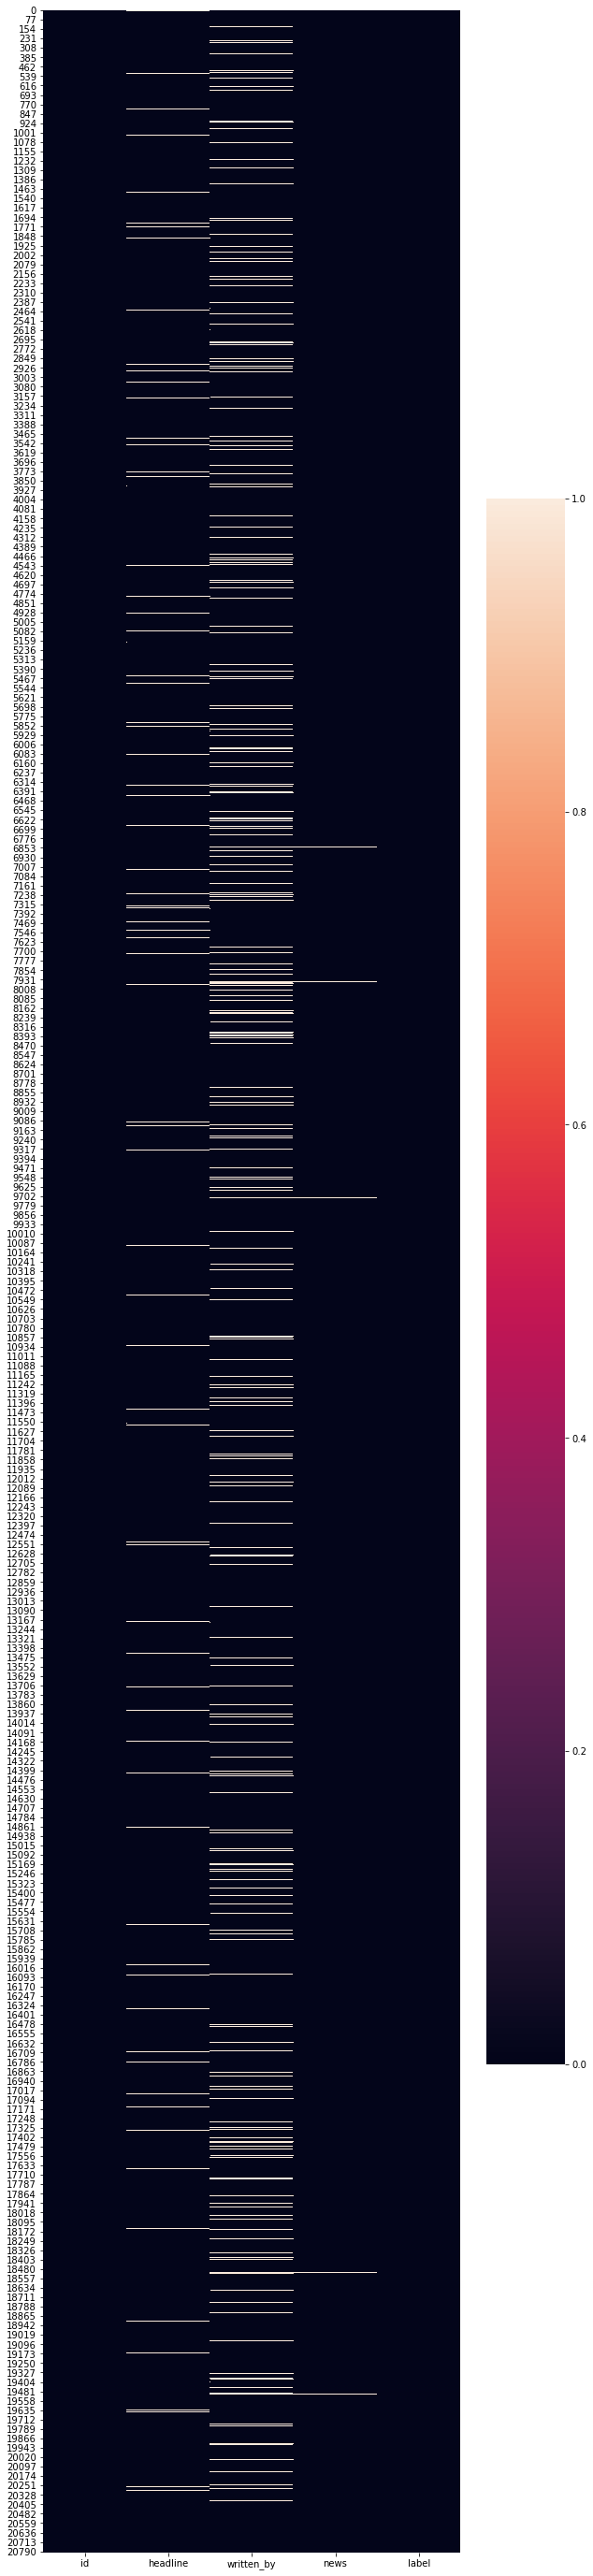

In [9]:
plt.figure(figsize=(10,50))
sns.heatmap(df1.isnull())

##### Observations from the above heatmap:-
1. It seems like there are no data wherein information regarding all the three columns ie., 'headlines', 'writtenby' and 'news' is not available.
2. Only few rows are there wherein both 'news' and 'writtenby' is not available

In [10]:
# Lets check if there any columns where 'news' and 'headlines' columns both are missing
df1[df1[['news','headline']].notnull()]
# There are no rows where both values are missing

,id,headline,written_by,news,label
0,NaN,Ethics Questions Dogged Agriculture Nominee as...,NaN,"WASHINGTON — In Sonny Perdue’s telling, Geo...",NaN
1,NaN,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,NaN,HOUSTON — Venezuela had a plan. It was a ta...,NaN
2,NaN,Cotton to House: ’Do Not Walk the Plank and Vo...,NaN,"Sunday on ABC’s “This Week,” while discussing ...",NaN
3,NaN,"Paul LePage, Besieged Maine Governor, Sends Co...",NaN,"AUGUSTA, Me. — The beleaguered Republican g...",NaN
4,NaN,A Digital 9/11 If Trump Wins,NaN,Finian Cunningham has written extensively on...,NaN
...,...,...,...,...,...
20795,NaN,NaN,NaN,"No, you'll be a dog licking of the vomit of yo...",NaN
20796,NaN,Albert Pike and the European Migrant Crisis,NaN,"By Rixon Stewart on November 5, 2016 Rixon Ste...",NaN
20797,NaN,Dakota Access Caught Infiltrating Protests to ...,NaN,posted by Eddie You know the Dakota Access Pip...,NaN
20798,NaN,How to Stretch the Summer Solstice - The New Y...,NaN,"It’s officially summer, and the Society Boutiq...",NaN


In [11]:
# Filling null values. Here filling the missing values by mode or median will be illogical. Hence, we can simply replace the null values by 'not available'

df1.fillna('not available', inplace=True)
df1.isnull().sum()

id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

In [12]:
# checking the no. of values of each class
df1.label.value_counts()
# The dataset is balanced

1    10413
0    10387
Name: label, dtype: int64

In [13]:
df1.written_by.value_counts()

not available                                         1957
Pam Key                                                243
admin                                                  193
Jerome Hudson                                          166
Charlie Spiering                                       141
                                                      ... 
Fernanda Santos, Kirk Semple and Caitlin Dickerson       1
Steve Eder and Dave Philipps                             1
lyle                                                     1
Jim                                                      1
Grace                                                    1
Name: written_by, Length: 4202, dtype: int64

In [14]:
df2=df1[df1.label==1]
df2

,id,headline,written_by,news,label
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,3196,Whatever the Outcome on November 8th the US Wi...,not available,Taming the corporate media beast Whatever the ...,1
7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
8,13559,not available,steventexas,People have made up their minds on president.\...,1
9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
...,...,...,...,...,...
20791,5895,"Putin: No difference between Clinton, Trump",Editor,Russian President Vladimir Putin has responded...,1
20792,7244,"REUTERS TO CUT 2,000 JOBS…",newsguy76,Warning : array_key_exists() expects parameter...,1
20795,5671,not available,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1


In [15]:
df2.written_by.value_counts()
# We can observe that amongst 1982 different authors, 1931 authors name are missing and have been replaced by not available.

not available    1931
admin             193
Pakalert           86
Eddy Lavine        85
Starkman           84
                 ... 
Harold Hughes       1
Max Roscoe          1
Heavy               1
peggie gor          1
tapatio             1
Name: written_by, Length: 1982, dtype: int64

In [16]:
df3=df1[df1.label==0]
df3.written_by.value_counts()
# Contrary to the fake news, for authentic news, it is easy to get the authors name

Pam Key                                                242
Jerome Hudson                                          166
Charlie Spiering                                       141
John Hayward                                           140
Katherine Rodriguez                                    124
                                                      ... 
Mitch Smith, Richard Pérez-Peña and Adam Goldman         1
Timothy Williams and Manny Fernandez                     1
Michael D. Shear, Nicholas Kulish and Alan Feuer         1
Logan Hill                                               1
Alexander Burns, Michael D. Shear and Ashley Parker      1
Name: written_by, Length: 2226, dtype: int64

In [17]:
df2.headline.value_counts()
# The headlines for fake news is not generalised and analysing it from using unique titles is not possible

not available                                                                                         558
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence      5
The Dark Agenda Behind Globalism And Open Borders                                                       5
Schools All Over America Are Closing On Election Day Due To Fears Of Violence                           4
“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                4
                                                                                                     ... 
ISIS Kidnaps, Kills at Least 30 Civilians in Afghanistan                                                1
False Teacher Beth Moore Endorses The Late Term Partial-Birth Abortion Candidate Crooked Hillary        1
Scientists Told To ‘Remain Silent’ On Glyphosate Cancer Findings                                        1
9/11 Firefighters Reveal Bombs Destroyed WTC l

In [18]:
#### Now we have go ahead and work on the text of the dataset. 
# We will have to clean the text and use tf-idf/word2vec to convert the text to numeric data and apply machine learning algorithms on the same


In [19]:
# importing necessary libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords 

In [20]:
ps=PorterStemmer()

In [ ]:
#### Let us consider only the headlines for building model in this notebook. 

In [21]:
#### Cleaning the text
cleaned_headlines=[]

for i in df1.headline:
    text=i.split()
    text=[k.lower() for k in text]
    text=[re.sub(r'[^A-Za-z]+', '', j) for j in text] 
    text=[i for i in text if not i in stopwords.words('english')]
    text=[ps.stem(i) for i in text]
    text=' '.join(text)
    cleaned_headlines.append(text)

cleaned_headlines



['ethic question dog agricultur nomine georgia governor  new york time',
 'us must dig deep stop argentina lionel messi  new york time',
 'cotton hous walk plank vote bill cannot pass senat  breitbart',
 'paul lepag besieg main governor send conflict signal intent  new york time',
 'digit  trump win',
 'whatev outcom novemb th us collis cours china  federico pieraccini',
 'rapid evolut save fish pollut studi say  new york time',
 'alabama prison offici retali prison strike leader cut water cell',
 'avail',
 'live constant state love',
 'hillari closet drunk new wikileak email reveal aid ask sober day',
 'bloombergback pennsylvania attorney gener sentenc  month prison',
 'video le pen pelt egg keep smile',
 'donald trump candid american special interest',
 'avail',
 'wharton busi school backer seek distanc donald trump  new york time',
 'brexit rule latest tactic block peopl',
 'million south korean rise shadow govern',
 'chelsea man ask obama cut sentenc time serv  new york time',
 'ci

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [23]:
#!pip install gensim

In [24]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(cleaned_headlines).toarray()

In [25]:
df3=pd.DataFrame({'headlines':cleaned_headlines,'label':df1['label']})
df3.head()

,headlines,label
0,ethic question dog agricultur nomine georgia g...,0
1,us must dig deep stop argentina lionel messi ...,0
2,cotton hous walk plank vote bill cannot pass s...,0
3,paul lepag besieg main governor send conflict ...,0
4,digit trump win,1


In [26]:
cleaned_headlines[0]

'ethic question dog agricultur nomine georgia governor  new york time'

In [27]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
y=df1['label']


In [29]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=42,test_size=0.20)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(16640, 16214)
(16640,)
(4160, 16214)
(4160,)


LogisticRegression()


Training score = 0.9429086538461539
Cross validation score 0.9237379807692309
Test score = 0.9247596153846154
[[1784  276]
 [  37 2063]]


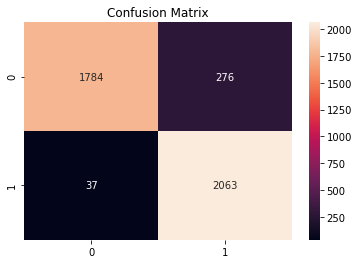

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2060
           1       0.88      0.98      0.93      2100

    accuracy                           0.92      4160
   macro avg       0.93      0.92      0.92      4160
weighted avg       0.93      0.92      0.92      4160

Accuracy = 0.9247596153846154
Precision = 0.8820008550662677
Recall = 0.9823809523809524
F1 Score = 0.9294886235638657


ROC AUC = 0.9790624133148405


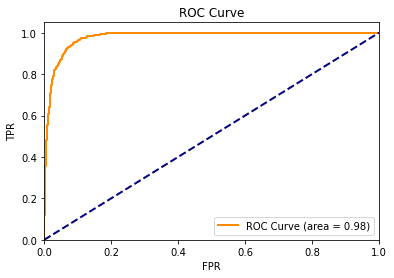

*************************************************************************************************
DecisionTreeClassifier()


Training score = 1.0
Cross validation score 0.918689903846154
Test score = 0.9108173076923077
[[1858  202]
 [ 169 1931]]


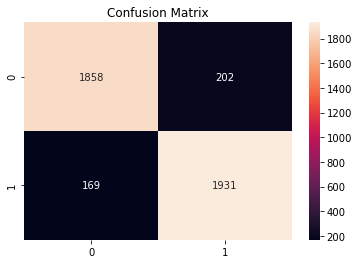

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2060
           1       0.91      0.92      0.91      2100

    accuracy                           0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160

Accuracy = 0.9108173076923077
Precision = 0.9052977027660571
Recall = 0.9195238095238095
F1 Score = 0.9123553035672101


ROC AUC = 0.9107327785483126


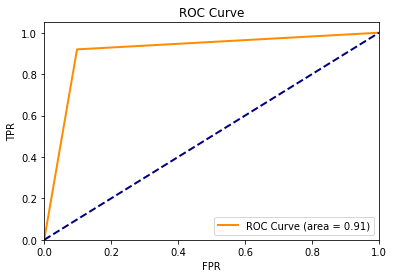

*************************************************************************************************
RandomForestClassifier()


Training score = 1.0
GradientBoostingClassifier()


Training score = 0.9240384615384616
Cross validation score 0.9197115384615385
Test score = 0.9192307692307692
[[1730  330]
 [   6 2094]]


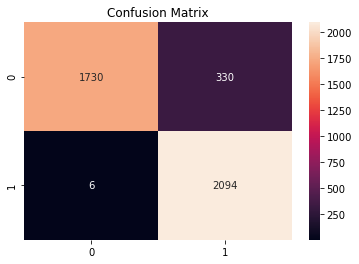

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2060
           1       0.86      1.00      0.93      2100

    accuracy                           0.92      4160
   macro avg       0.93      0.92      0.92      4160
weighted avg       0.93      0.92      0.92      4160

Accuracy = 0.9192307692307692
Precision = 0.8638613861386139
Recall = 0.9971428571428571
F1 Score = 0.9257294429708224


ROC AUC = 0.9625732778548314


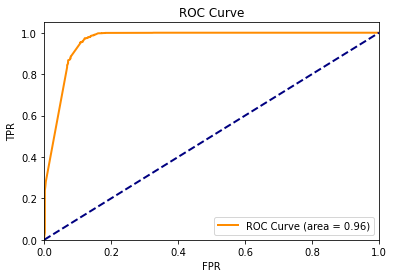

*************************************************************************************************
GaussianNB()


Training score = 0.8581730769230769
Cross validation score 0.6983173076923077
Test score = 0.6795673076923077
[[1773  287]
 [1046 1054]]


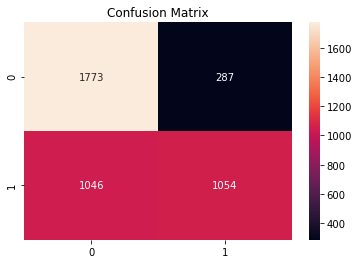

              precision    recall  f1-score   support

           0       0.63      0.86      0.73      2060
           1       0.79      0.50      0.61      2100

    accuracy                           0.68      4160
   macro avg       0.71      0.68      0.67      4160
weighted avg       0.71      0.68      0.67      4160

Accuracy = 0.6795673076923077
Precision = 0.7859806114839671
Recall = 0.5019047619047619
F1 Score = 0.6126126126126126


ROC AUC = 0.7027163661581138


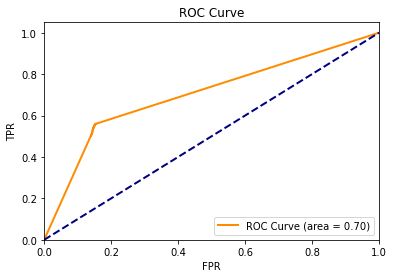

*************************************************************************************************
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Training score = 0.9507211538461539
Cross validation score 0.9311298076923077
Test score = 0.9286057692307692
[[1798  262]
 [  35 2065]]


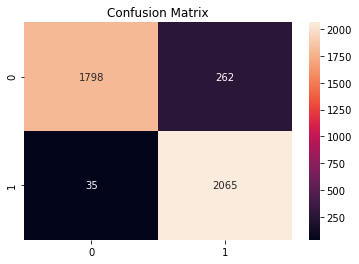

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2060
           1       0.89      0.98      0.93      2100

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160

Accuracy = 0.9286057692307692
Precision = 0.8874086807047701
Recall = 0.9833333333333333
F1 Score = 0.9329116783374745


ROC AUC = 0.9737632917244566


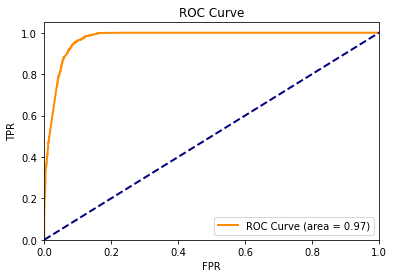

*************************************************************************************************


In [31]:

#### Checking model performance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve,roc_auc_score

for model in [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), GaussianNB(), XGBClassifier()]:
    model.fit(train_x, train_y)
    pred=model.predict(test_x)
    acc=accuracy_score(pred,test_y)
    print(model)
    print("\n")
    print('Training score =', model.score(train_x, train_y))
    print("Cross validation score", cross_val_score(model,train_x,train_y).mean())
    print('Test score =', acc)
    cm = confusion_matrix(test_y, pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(test_y,pred))
    tn = cm[0,0]  #True Negative
    tp = cm[1,1]  #True Positives
    fp = cm[0,1]  #False Positives
    fn = cm[1,0]  #False Negatives

    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = 2*precision*recall / (precision+recall)

    print('Accuracy =',accuracy)
    print('Precision =', precision)
    print('Recall =', recall)
    print('F1 Score =', f1)
    print("\n")
    ypred = model.predict_proba(test_x)
    fpr,tpr,threshold = roc_curve(test_y,ypred[:,1])
    roc_auc = roc_auc_score(test_y,ypred[:,1])

    print('ROC AUC =', roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    print("*************************************************************************************************")
    

In [ ]:
# We can finalise random forest and xgb boosting as they are giving better scores